# 1. Download and Imports

In [1]:
# Fundamental classes
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os

# Image related
import cv2
from PIL import Image

#Performance Plot
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For the model and it's training
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.models import load_model

# Time
import time
import datetime

# Warnings
import warnings
warnings.filterwarnings('ignore')

# 2. Functions

In [2]:
# date_time function

def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:    
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:  
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:  
        return 'Date today: %s' % datetime.date.today()

In [3]:
# Performance Plot

def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()

# 3. Loading Dataset (Traffic Signs Images)

In [4]:
# Setting variables for later use
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join('./input/gtsrb-german-traffic-sign/','Train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

# 4. Data Splitting and conversion

In [5]:
# Checking data shape
print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Displaying the shape after the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


# 5. Creating and Compiling the Model

In [6]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.15))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.20))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#M odel display
model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,624,939 (6.20 MB)

 Trainable params: 1,624,939 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

# 6. Training the Model

In [8]:
# Training the Model
with tf.device('/GPU:1'):
    epochs = 35
    history1 = model.fit(X_train, y_train, batch_size=128, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 31s 127ms/step - accuracy: 0.8852 - loss: 0.4409 - val_accuracy: 0.9737 - val_loss: 0.1126
Epoch 2/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 31s 124ms/step - accuracy: 0.9558 - loss: 0.1704 - val_accuracy: 0.9876 - val_loss: 0.0549
Epoch 3/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 29s 118ms/step - accuracy: 0.9706 - loss: 0.1062 - val_accuracy: 0.9906 - val_loss: 0.0360
Epoch 4/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 29s 118ms/step - accuracy: 0.9784 - loss: 0.0805 - val_accuracy: 0.9806 - val_loss: 0.0915
Epoch 5/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 29s 118ms/step - accuracy: 0.9564 - loss: 0.1862 - val_accuracy: 0.9917 - val_loss: 0.0380
Epoch 6/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 29s 118ms/step - accuracy: 0.9881 - loss: 0.0496 - val_accuracy: 0.9887 - val_loss: 0.0485
Epoch 7/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 29s 118ms/step - accuracy: 0.9834 - loss: 0.0661 - val_accuracy: 0.9927 - val_loss: 0.0345
Epoch 8/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 29s 118ms/step - accuracy: 0.9867 - loss: 0

# 7. Visualizing the performance of the Model during Training Phase

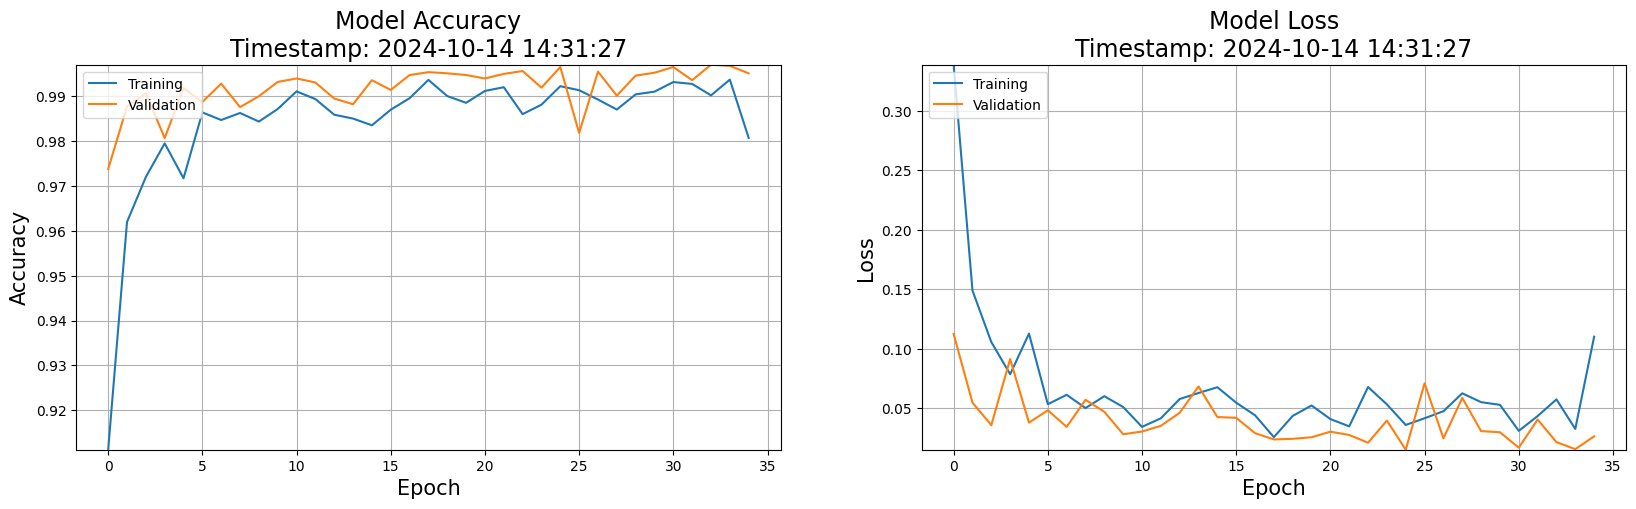

In [9]:
plot_performance(history=history1)

# 8. Loading Test Dataset and Evaluating the Model

In [10]:
# testing accuracy on test dataset
from sklearn.metrics import accuracy_score

# Importing the test dataset
y_test = pd.read_csv('./input/gtsrb-german-traffic-sign/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

# Retreiving the images
with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open('./input/gtsrb-german-traffic-sign/'+img)
        image = image.resize([30, 30])
        data.append(np.array(image))

X_test=np.array(data)

In [12]:
# evaluate the model
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
accuracy_score(labels, y_pred)

395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step


0.967458432304038

# 9. Saving the Model

In [ ]:
# Saving the Model 
model.save('traffic_classifier.keras')

# 10. Visualizing the Performance






  ahead only


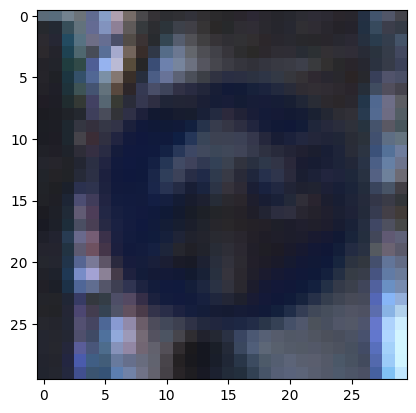

In [16]:
# load the model
model = load_model('traffic_classifier.keras', compile = False)

# get all .png files from the test folder
test_folder = './input/gtsrb-german-traffic-sign/Test/'
all_images = [f for f in os.listdir(test_folder) if f.endswith('.png')]

# select a random image
random_image = np.random.choice(all_images)
img_path = os.path.join(test_folder, random_image)

# load and process the image
img = Image.open(img_path)
img = img.resize([30, 30])
img = np.array(img)
plt.imshow(img)

# prepare the image for model prediction
img = np.expand_dims(img, axis=0)

# load the sign names
sign_names = pd.read_csv('./input/gtsrb-german-traffic-sign/Signs.csv')

# predict the class of the image
predicted_class = np.argmax(model.predict(img, verbose=0), axis=-1)[0]

# print the sign name corresponding to the predicted class
print('\n\n\n',sign_names[sign_names['Code'] == predicted_class].values[0][1])